In [2]:
import os
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

os.chdir('C:/Users/kitteringhamrr/Desktop/Pymplnet/pymplnet/mplnet-data/pymplnet/data')
df_data = pd.read_csv('nrbmeanandstdev.csv')
df_mask = pd.read_csv('cldmaskmeanandstdev.csv')


In [3]:
threshold = 0.05
mask = np.array(df_mask['cloud_base'] < threshold)
data_masked = df_data[mask]
data_masked.set_index('time', inplace = True)
print(data_masked)

                     1.380 km  1.455 km  1.530 km  1.605 km  1.680 km  \
time                                                                    
2024-11-16 08:00:00  0.291289  0.287838  0.303566  0.328659  0.350412   
2024-11-16 09:00:00  0.293723  0.293150  0.302075  0.322501  0.341364   
2024-11-16 10:00:00  0.294096  0.292046  0.304132  0.327873  0.344843   
2024-11-16 11:00:00  0.293410  0.286156  0.295274  0.317753  0.337352   
2024-11-16 12:00:00  0.295259  0.285330  0.291892  0.312537  0.330304   
2024-11-16 13:00:00  0.310820  0.284766  0.289549  0.314335  0.335759   
2024-11-16 14:00:00  0.308029  0.273873  0.282505  0.312708  0.338549   
2024-11-16 15:00:00  0.337966  0.305763  0.283026  0.311855  0.337620   
2024-11-16 16:00:00  0.354530  0.343083  0.317218  0.324372  0.338522   
2024-11-16 17:00:00  0.348580  0.369580  0.355815  0.363842  0.367351   
2024-11-16 18:00:00  0.316713  0.309748  0.323982  0.364487  0.390286   
2024-11-16 19:00:00  0.298171  0.279993  0.293369  

In [81]:
nrb = [0]*len(data_masked.columns)
stdev = [0]*len(data_masked.columns)
altitude = [0]*len(data_masked.columns)

for i in range(len(data_masked.columns)):
    altitude[i] = data_masked.columns[i]
    nrb_mask = data_masked[altitude[i]] > -1
    nrb[i] = np.mean(data_masked[altitude[i]][nrb_mask])
    stdev[i] = np.std(data_masked[altitude[i]][nrb_mask])
    altitude[i] = float(altitude[i].strip(' km'))

df_final = pd.DataFrame(data = {'Altitude [km]': altitude, 'NRB': nrb, 'Std Dev': stdev})

 
print(np.mean(data_masked['25.963 km']))
print(np.mean(data_masked['25.963 km']))
print(nrb[320:340])
#print(altitude)
#print(nrb)
#stdev_mask = np.array(stdev) > 0.1
#print(np.array(stdev)[stdev_mask])


-1.628189712155
-1.628189712155
[0.01926945944375, 0.02005201039375, -0.005556284462500001, 0.0359082954625, 0.02459510774375, -0.01717856696875, 0.004460870739375002, -0.00293906734375, 0.021359640368, 0.020295579, 0.009623534975, -0.0202515, 0.02156329001875, -0.006190017454374999, 0.01642289390625, -0.009685202956250001, -0.00659759576875, 0.014325251787499998, 0.006631033504937501, -0.031751100974999995]


In [82]:
df_final.to_csv('NRBMeanMask_L1_Y2024_M11_D16.csv')

Text(0.5, 1.0, 'Masked NRB Data of 11/16/2024')

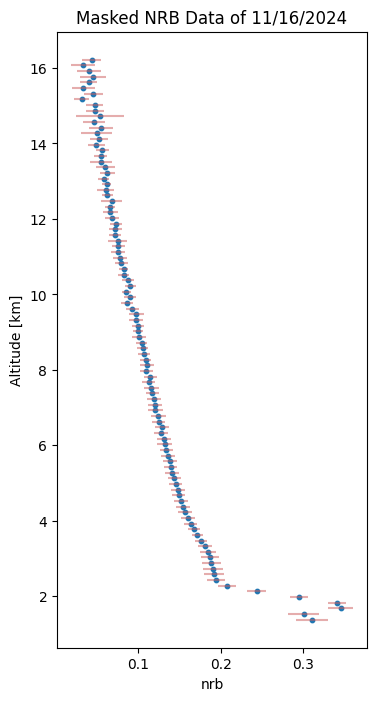

In [85]:
plt.rcParams['figure.figsize'] = [4, 8]

indexing_num = 2
nrb_ind = nrb[0:200:indexing_num]
alt_ind = altitude[0:200:indexing_num]
std_ind = stdev[0:200:indexing_num]

#start = 20
#nrb_ind = np.concatenate((nrb[0:start], nrb[start:len(nrb):indexing_num]))
#alt_ind = np.concatenate((altitude[0:start], altitude[start:len(altitude):indexing_num]))
#std_ind = np.concatenate((stdev[0:start], stdev[start:len(stdev):indexing_num]))

plt.scatter(nrb_ind, alt_ind, s = 10)
plt.errorbar(nrb_ind, alt_ind, xerr = std_ind, fmt = 'none', color = 'indianred', alpha = 0.5)
plt.xlabel('nrb')
plt.ylabel('Altitude [km]')
plt.title('Masked NRB Data of 11/16/2024')